In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [4]:
# Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display first few rows of the training data
print("Training Data Head:")
display(train_df.head())

# Display info to check for missing values and data types
print("\nTraining Data Info:")
train_df.info()

Training Data Head:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


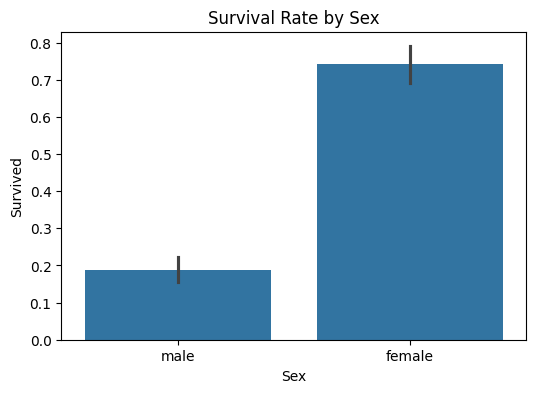

In [5]:
# Survival rate by Sex
plt.figure(figsize=(6, 4))
sns.barplot(data=train_df, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.show()

In [6]:
# Check for missing values
print("Missing values in Train:")
print(train_df.isnull().sum())
print("\nMissing values in Test:")
print(test_df.isnull().sum())

Missing values in Train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in Test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# Fill missing Age with median to preserve the distribution
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# Fill missing Embarked with mode (most frequent port)
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Fill missing Fare in test set with median
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Drop Cabin as it has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

In [8]:
# Manual mapping for simplicity
sex_mapping = {'male': 0, 'female': 1}
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

# Drop Name, Ticket, PassengerId as they are not useful for prediction in this simple model
train_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Keep PassengerId in Test for submission but drop from features
test_passenger_ids = test_df['PassengerId']
test_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [9]:
# Prepare features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split training data for validation (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
val_predictions = rf_model.predict(X_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.8268


In [10]:
# Predict on test set
test_predictions = rf_model.predict(test_df)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions
})

# Check shape to ensure it is correct (418 rows, 2 columns)
print(f"Submission shape: {submission.shape}")

# Verify first few rows
print(submission.head())

# Save to CSV
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully.")

Submission shape: (418, 2)
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0
Submission file 'submission.csv' created successfully.
